<a href="https://colab.research.google.com/github/tamnguyen2189/Drinks_Recipes/blob/master/EDA_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drinks Ingredients & Recipes**
![](https://t4.ftcdn.net/jpg/02/34/63/07/360_F_234630793_eHKQucxaXftnWrecTJFITmD4cr3TlUgG.jpg)





# 1. Overview Data

## 1.1. Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 21.4MB/s 
     |████████████████████████████████| 15.3MB 153kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=4c0ad9470f94c6cb2d52c9d6d90beacaa45cba24c5f8bf6d37a6aeb2e61dd250
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
pip install -U gensim

     |████████████████████████████████| 23.9MB 120kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# EDA
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Doc2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
from gensim.test.utils import get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import spacy
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pickle


# Sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")
# Show float data in two decimal number
pd.set_option('float_format', '{:.2f}'.format)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1.2. Loading Data

In [ ]:
# # Load data: concatenate all recipes into one file
# path = r'/content/gdrive/MyDrive/Colab Notebooks/Final Project/Recipes' # use your path
# files = glob.glob(path + "/*.csv")

# all_files = []

# for filename in files:
#     df_sub = pd.read_csv(filename, index_col=None, header=0, encoding='utf-8')
#     all_files.append(df_sub)
#     # print(filename)

# frame = pd.concat(all_files, axis=0, ignore_index=True)

In [ ]:
# Load data
path = r'/content/gdrive/MyDrive/Colab Notebooks/Final Project/Recipes/clean_recipe.csv'
frame = pd.read_csv(path, index_col=None, header=0, encoding='utf-8')

In [ ]:
# Load data for training
path = r'/content/gdrive/MyDrive/Colab Notebooks/Final Project/Recipes/clean_recipe_training.csv'
frame = pd.read_csv(path, index_col=None, header=0, encoding='utf-8')

In [ ]:
df = frame.copy()
df_clean = frame.copy()

## 1.3. Overview Data

In [ ]:
df.describe()

,drink_name,recipe,recipe_url,url_of_image
count,1560,1560,1560,1560
unique,1560,1560,1559,1537
top,Moscow Mule,"1 tablespoon olive oil, 6 pita bread loaves, 1...",https://www.thespruceeats.com/jack-o-lantern-c...,/img/icons/generic-recipe.svg
freq,1,1,2,21


In [ ]:
df['recipe'].describe()

count     6866
unique    1587
top         []
freq      2741
Name: recipe, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7887 entries, 0 to 7886
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   drink_name    7513 non-null   object
 1   recipe        6866 non-null   object
 2   recipe_url    6866 non-null   object
 3   url_of_image  6845 non-null   object
dtypes: object(4)
memory usage: 246.6+ KB


# 2. Data Cleaning

## 2.1. Working with duplicated data

In [ ]:
# Check wrong data
df[df['recipe'] == '[]'].count()

drink_name      0
recipe          0
recipe_url      0
url_of_image    0
dtype: int64

In [ ]:
# Drop wrong data
df.drop(df[df['recipe'] == '[]'].index, inplace= True)

In [ ]:
# Check for duplication in "drink_name" column only 
df[df.duplicated(subset='drink_name')]

,drink_name,recipe,recipe_url,url_of_image
1047,Turmeric Tea,"['2 tablespoons ground turmeric', '1/4 cup wat...",https://www.thespruceeats.com/traditional-yogi...,https://www.thespruceeats.com/thmb/2e9g8GRB6kR...
6805,Irish Slammer,"['¾ fluid ounce Irish whiskey ', '¾ fluid ounc...",https://www.allrecipes.com/recipe/22721/irish-...,https://imagesvc.meredithcorp.io/v3/mm/image?u...
6865,Tom Collins Cocktail,"['1\u2009½ cups ice ', '2 fluid ounces gin ', ...",https://www.allrecipes.com/recipe/222511/tom-c...,https://imagesvc.meredithcorp.io/v3/mm/image?u...
6870,Blue Hawaiian Cocktail,"['1 fluid ounce light rum ', '1 fluid ounce bl...",https://www.allrecipes.com/recipe/222550/blue-...,https://imagesvc.meredithcorp.io/v3/mm/image?u...
6880,Grasshopper Cocktail,"['¾ fluid ounce creme de menthe ', '¾ fluid ou...",https://www.allrecipes.com/recipe/222885/grass...,https://imagesvc.meredithcorp.io/v3/mm/image?u...
...,...,...,...,...
9442,Pomegranate Grapefruit Frosé,"3 ounces rosé wine, 1 ounce pomegranate vodka,...",https://www.thespruceeats.com/pomegranate-grap...,https://www.thespruceeats.com/thmb/H-b0hxQw03N...
9443,Tequila Sangria,"3/4 cup water, 3/4 cup sugar, 1 tea bag hibisc...",https://www.thespruceeats.com/liquid-lust-reci...,https://www.thespruceeats.com/thmb/4-evXHeQjR8...
9444,Brazilian Sangria,"1/2 cup fresh seasonal fruits, 1/2 ounce absin...",https://www.thespruceeats.com/brazilian-sangri...,https://www.thespruceeats.com/thmb/vdKWdkVi6nI...
9445,Frisco 49,"1 medium bartlett pear, 1 medium anjou pear, 1...",https://www.thespruceeats.com/frisco-49-recipe...,https://www.thespruceeats.com/thmb/5l9tyXQaaTo...


In [ ]:
# Drop duplicated data
df.drop_duplicates(subset ='recipe',
                     keep = 'first', inplace = True)

In [ ]:
# Check data after drop
df

,drink_name,recipe,recipe_url,url_of_image
2,Citrus-Flavored Margarita Salt,"['2 tablespoons lime zest', '2 tablespoons ora...",https://www.thespruceeats.com/margarita-salt-r...,https://www.thespruceeats.com/thmb/7AaVYIydt7O...
3,Rum Swizzle Cocktail,"['2 cups crushed ice', '1 ounce dark rum', '1 ...",https://www.thespruceeats.com/rum-swizzle-cock...,https://www.thespruceeats.com/thmb/00YL986heml...
7,Keto Mulled Wine,"['1 cup water', '1 orange', '1 cup cranberries...",https://www.thespruceeats.com/keto-mulled-wine...,https://www.thespruceeats.com/thmb/JTiQycCw4Bd...
11,Keto Simple Syrup,"['1 cup water', '1 cup allulose monk fruit swe...",https://www.thespruceeats.com/keto-simple-syru...,https://www.thespruceeats.com/thmb/bxHhYJVt3Oz...
13,Birthday Cake Shot,"['Vanilla frosting', 'Candy sprinkles', '1 oun...",https://www.thespruceeats.com/birthday-cake-sh...,https://www.thespruceeats.com/thmb/S5ddalTkIbo...
...,...,...,...,...
9442,Pomegranate Grapefruit Frosé,"3 ounces rosé wine, 1 ounce pomegranate vodka,...",https://www.thespruceeats.com/pomegranate-grap...,https://www.thespruceeats.com/thmb/H-b0hxQw03N...
9443,Tequila Sangria,"3/4 cup water, 3/4 cup sugar, 1 tea bag hibisc...",https://www.thespruceeats.com/liquid-lust-reci...,https://www.thespruceeats.com/thmb/4-evXHeQjR8...
9444,Brazilian Sangria,"1/2 cup fresh seasonal fruits, 1/2 ounce absin...",https://www.thespruceeats.com/brazilian-sangri...,https://www.thespruceeats.com/thmb/vdKWdkVi6nI...
9445,Frisco 49,"1 medium bartlett pear, 1 medium anjou pear, 1...",https://www.thespruceeats.com/frisco-49-recipe...,https://www.thespruceeats.com/thmb/5l9tyXQaaTo...


## 2.2. Working with missing value

In [ ]:
# Check na values
df.isnull().sum()

drink_name      0
recipe          0
recipe_url      0
url_of_image    0
dtype: int64

In [ ]:
# Drop all na values
df.dropna(axis=0, inplace=True)

In [ ]:
# Check data after drop
df

,drink_name,recipe,recipe_url,url_of_image
2,Citrus-Flavored Margarita Salt,"['2 tablespoons lime zest', '2 tablespoons ora...",https://www.thespruceeats.com/margarita-salt-r...,https://www.thespruceeats.com/thmb/7AaVYIydt7O...
3,Rum Swizzle Cocktail,"['2 cups crushed ice', '1 ounce dark rum', '1 ...",https://www.thespruceeats.com/rum-swizzle-cock...,https://www.thespruceeats.com/thmb/00YL986heml...
7,Keto Mulled Wine,"['1 cup water', '1 orange', '1 cup cranberries...",https://www.thespruceeats.com/keto-mulled-wine...,https://www.thespruceeats.com/thmb/JTiQycCw4Bd...
11,Keto Simple Syrup,"['1 cup water', '1 cup allulose monk fruit swe...",https://www.thespruceeats.com/keto-simple-syru...,https://www.thespruceeats.com/thmb/bxHhYJVt3Oz...
13,Birthday Cake Shot,"['Vanilla frosting', 'Candy sprinkles', '1 oun...",https://www.thespruceeats.com/birthday-cake-sh...,https://www.thespruceeats.com/thmb/S5ddalTkIbo...
...,...,...,...,...
9442,Pomegranate Grapefruit Frosé,"3 ounces rosé wine, 1 ounce pomegranate vodka,...",https://www.thespruceeats.com/pomegranate-grap...,https://www.thespruceeats.com/thmb/H-b0hxQw03N...
9443,Tequila Sangria,"3/4 cup water, 3/4 cup sugar, 1 tea bag hibisc...",https://www.thespruceeats.com/liquid-lust-reci...,https://www.thespruceeats.com/thmb/4-evXHeQjR8...
9444,Brazilian Sangria,"1/2 cup fresh seasonal fruits, 1/2 ounce absin...",https://www.thespruceeats.com/brazilian-sangri...,https://www.thespruceeats.com/thmb/vdKWdkVi6nI...
9445,Frisco 49,"1 medium bartlett pear, 1 medium anjou pear, 1...",https://www.thespruceeats.com/frisco-49-recipe...,https://www.thespruceeats.com/thmb/5l9tyXQaaTo...


## 2.3 Functions

In [ ]:
# Function to clean recipes in dataset
def clean_recipe(recipe):
    pat1 = r'[\'\"\(\)*,:;.!?~\[\]\{\}]'
    pat2 = r'\\\w{2}\d'  
    pat3 = r'\\\w\d{4}'
    pat4 = r'\\\w\d{3}\w'
    clean_recipe = recipe.replace('-',' ').lower()  #.strip('-[]{}\'!?~')
    clean_recipe = re.sub(pat1,'',clean_recipe)
    clean_recipe = re.sub(pat2,'',clean_recipe)
    clean_recipe = re.sub(pat3,'',clean_recipe)
    clean_recipe = re.sub(pat4,'',clean_recipe)
    return clean_recipe


In [ ]:
# Function to search recipes in dataset
def searching_recipe(ingredients, data):
    """ Dataset: df_clean
        Input: Ingredients
        Flow: searching recipe in dataset
        Output: all informations that contain ingredients
    """
    recipe_list = []
    drink_name = []
    recipe_url = []
    image_url = []
    for i in range(len(data['recipe'])):
        check_recipe = all(item in data['recipe'][i] for item in ingredients)
        check_name = any(item in data['drink_name'][i] for item in ingredients)
        if check_recipe == True:
            recipe_list.append(data['recipe'][i])
            drink_name.append(data['drink_name'][i])
            recipe_url.append(data['recipe_url'][i])
            image_url.append(data['url_of_image'][i])
        elif check_name == True:
            recipe_list.append(data['recipe'][i])
            drink_name.append(data['drink_name'][i])
            recipe_url.append(data['recipe_url'][i])
            image_url.append(data['url_of_image'][i])
    
    return recipe_list, drink_name, recipe_url, image_url

## 2.4. Cleaning recipes

In [ ]:
# Copy data
df_clean = df.copy()

In [ ]:
# Apply cleaning function on df_clean
df_clean['recipe'] = df_clean['recipe'].apply(lambda x: clean_recipe(x))
df_clean['drink_name'] = df_clean['drink_name'].apply(lambda x: clean_recipe(x))

In [ ]:
# Check all recipes with error url_of_image
df_clean[df_clean['url_of_image']=='/img/icons/generic-recipe.svg']

,drink_name,recipe,recipe_url,url_of_image
939,frank the tanks red dragon ale,3 gallons water 8 ounces crystal malt 4 ounc...,https://www.allrecipes.com/recipe/101895/frank...,/img/icons/generic-recipe.svg
940,irish chocolate stout,3 gallons water 2 teaspoons gypsum divided ...,https://www.allrecipes.com/recipe/102126/irish...,/img/icons/generic-recipe.svg
946,irish cookie,½ ounce stirrings chocolate peppermintini cock...,https://www.allrecipes.com/recipe/179324/irish...,/img/icons/generic-recipe.svg
947,snail pale,3 gallons water 8 ounces crystal malt 60l in ...,https://www.allrecipes.com/recipe/101923/snail...,/img/icons/generic-recipe.svg
967,spiked hot apple cider,1 gallon apple cider 3 cinnamon sticks broke...,https://www.allrecipes.com/recipe/235526/spike...,/img/icons/generic-recipe.svg
968,holiday apple wassail,1 gallon apple cider 6 apples cored and cut ...,https://www.allrecipes.com/recipe/181762/holid...,/img/icons/generic-recipe.svg
970,hot mulled cider,9 whole cloves 9 whole allspice berries 4 ...,https://www.allrecipes.com/recipe/275198/hot-m...,/img/icons/generic-recipe.svg
972,freyja farms holiday mulled cider,40 whole cloves 2 large oranges peeled 2 ...,https://www.allrecipes.com/recipe/240768/freyj...,/img/icons/generic-recipe.svg
973,christmas wassail with baked apples,3 large cooking apples cored and halved 1 gal...,https://www.allrecipes.com/recipe/230423/chris...,/img/icons/generic-recipe.svg
975,holiday cider,1 gallon apple cider 1 64 fluid ounce bottle ...,https://www.allrecipes.com/recipe/276190/holid...,/img/icons/generic-recipe.svg


In [ ]:
# Drop recipe with error url
df_clean.drop(df_clean[df_clean['url_of_image']=='/img/icons/generic-recipe.svg'].index, inplace= True)

In [ ]:
# Save data for training after cleaning
data = df_clean
path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Recipes'
# items = pd.DataFrame(data = data, columns = data[0].keys())
data.to_csv(path + "/clean_recipe_training.csv", index=False)

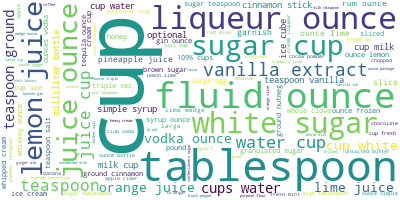

In [ ]:
# Visualize texts in data
from wordcloud import WordCloud
long_string = ','.join(df_clean['recipe'])
wordcloud = WordCloud(background_color = 'white',max_words=5000,contour_width=5,contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# 3. Doc2Vec

There are multiple methods to change the text into vectors:

- Label Encoding
- Custom binary Encoding
- One-Hot Encoding

But these methods will lose the context of a given text. Doc2Vec can solve this problem by creating vectors out of a document, independent of the document length.

## 3.1. Import libraries and load data

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
from gensim.test.utils import get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Load data
path = r'/content/gdrive/MyDrive/Colab Notebooks/Final Project/Recipes/clean_recipe_training.csv'
frame = pd.read_csv(path, index_col=None, header=0, encoding='utf-8')

In [ ]:
df_clean = frame.copy()

## 3.2. Preprocessing data

**Getting training data**

We define our list of sentences. Here is the column of recipe. It's good to use a list of sentences for easier processing of each sentence. 

We will also keep  a tokenized version of these sentences

In [ ]:
# Find vector of chosen recipe
sentence = []
for i in df_clean['recipe']:
    sentence.append(i)

# Tokenization of each document
tokenized_sent = []
for s in sentence:
    tokenized_sent.append(word_tokenize(s))
tokenized_sent

**TaggedDocument:**

Iterate over a file that contains documents: each sentence is now represented as a TaggedDocument containing a list of the words in it and a tag associated with it.

Note:

Words are expected to be already preprocessed and separated by whitespace. Document tags are constructed automatically from the document line number (each document gets a unique integer tag).

In [ ]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['2', 'tablespoons', 'lime', 'zest', '2', 'tablespoons', 'orange', 'zest', '1/2', 'cup', 'kosher', 'salt', '1/2', 'cup', 'coarse', 'sea', 'salt', '1/4', 'cup', 'sugar'], tags=[0]),
 TaggedDocument(words=['2', 'cups', 'crushed', 'ice', '1', 'ounce', 'dark', 'rum', '1', 'ounce', 'light', 'rum', '1/2', 'ounce', 'falernum', '2', 'ounces', 'orange', 'juice', '2', 'ounces', 'pineapple', 'juice', '1/2', 'ounce', 'lemon', 'juice', '3', 'dashes', 'aromatic', 'bitters', 'orange', 'slice'], tags=[1]),
 TaggedDocument(words=['1', 'cup', 'water', '1', 'orange', '1', 'cup', 'cranberries', '2', 'tablespoons', 'sugar-free', 'maple', 'syrup', '3', 'pods', 'star', 'anise', '3', 'cinnamon', 'sticks', '1/4', 'teaspoon', 'nutmeg', '1', 'bottle', 'red', 'wine', '1/3', 'cup', 'brandy'], tags=[2]),
 TaggedDocument(words=['1', 'cup', 'water', '1', 'cup', 'allulose', 'monk', 'fruit', 'sweetener'], tags=[3]),
 TaggedDocument(words=['vanilla', 'frosting', 'candy', 'sprinkles', '1', 'ounce', 

## 3.3. Training model

Next, we train the model with the parameters


In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 50, window = 2, min_count = 2, epochs = 30)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
# model.wv.vocab
# model.wv.key_to_index

'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

**Save model**

In [ ]:
# Save model
model.save("./doc2vecmodel_4.0.mod")

In [ ]:
# Load model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/doc2vecmodel_final.mod'
model = Doc2Vec.load(model_path) 

## 3.4. Finding similar vectors

Now, we give a test sentence. The infer_vector function returns the vectorized form of test sentence.

Let's call the most_similar function, which returns top most similar sentences and its indices throughout the document.

In [ ]:
# Input test sentence
input = "2 ounces gin, 4 ounces tonic, strawberry"

# Change input sentence into vector
test_doc = word_tokenize(input.lower())
test_doc_vector = model.infer_vector(test_doc)

# Find similar vectors
model.docvecs.most_similar(positive = [test_doc_vector]) #positive = List of sentences that contribute positively.

[(513, 0.9193164706230164),
 (682, 0.9132674336433411),
 (494, 0.8971699476242065),
 (518, 0.8922135233879089),
 (680, 0.8858006596565247),
 (650, 0.8837151527404785),
 (568, 0.8755530118942261),
 (647, 0.8673471212387085),
 (756, 0.8666015267372131),
 (466, 0.8606708645820618)]

In [ ]:
# Print the indices of similar vectors
similar_vector = model.docvecs.most_similar(positive = [test_doc_vector])
for i in similar_vector:
    print(i[0])

495
518
497
568
494
712
465
496
1512
565


In [ ]:
# Check recipe of similar vector:
df_clean['recipe'][495]

'2 ounces gin, 1/2 ounce lime juice, 4 ounces ginger beer, lime wedge'

# 4. Doc2Vec: K-Means

## 4.1. Preprocessing data

In [ ]:
# Load model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/doc2vecmodel_final.mod'
model = Doc2Vec.load(model_path) 

In [ ]:
# Find vector of chosen recipe
sentence = []
for i in df_clean['recipe']:
    sentence.append(i)

# Tokenization of each document
tokenized_sent = []
for s in sentence:
    tokenized_sent.append(word_tokenize(s))

In [ ]:
X = [model.infer_vector(i).tolist() for i in tokenized_sent]
X = np.array(X)

## 4.2. Principal Components Analysis

PCA reduces the dimensionality of the data set, allowing most of the variability to be explained using fewer variables.

Let's generate a two-dimensional dataset

In [ ]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components= n_components) 
pca.fit(X)
X_pca = pca.transform(X)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)
print(X.shape)
print(X_pca.shape)


(1539, 50)
(1539, 2)


- ``components_``: array, shape (n_components, n_features): Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.
- ``explained_variance_ratio_``: array, shape (n_components,):
Percentage of variance explained by each of the selected components.

In [ ]:
print(pca.components_)

[[-0.07673658  0.08046439 -0.05818005 -0.11894281 -0.19325483 -0.07034108
  -0.08776733 -0.00856599 -0.12477423 -0.12172503  0.07487708 -0.23434296
   0.01298462  0.1639985  -0.02106548  0.02051555  0.19092354 -0.093711
   0.04934776 -0.21613161 -0.0628687  -0.23875789  0.05895393 -0.17221007
  -0.25801073  0.14534832 -0.0936882  -0.01175988 -0.00874661  0.0004636
  -0.04032926 -0.12944619  0.38195351 -0.24313853  0.04792816 -0.1125421
   0.06335632 -0.14494026 -0.10892584  0.0521277  -0.06154621  0.03768438
  -0.10294232 -0.20242655  0.05573611  0.09392311  0.37549294  0.16518528
   0.0276214  -0.01810577]
 [ 0.17844258  0.02999447 -0.10812841 -0.24277243  0.00095118 -0.20513334
   0.22145611 -0.18527812  0.18522568  0.08781289  0.11790909 -0.09803245
   0.01233953  0.16309537 -0.11208021  0.09728882 -0.16409878  0.18091846
  -0.08132265  0.13126961 -0.0269735  -0.08687725  0.15636719 -0.18742798
   0.1371536   0.19686418 -0.15335097  0.11114351  0.06185715 -0.22581405
  -0.20305639  

In [ ]:
print(pca.explained_variance_ratio_)

[0.12631563 0.09829983]


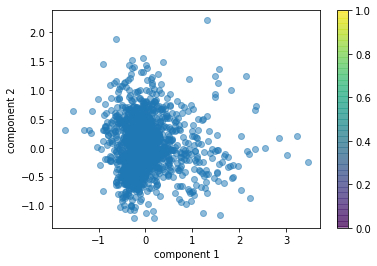

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
             alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

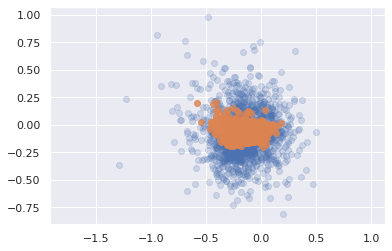

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## 4.3. Visualize K-means Clustering

**Optiamal k in K-means**

We can use the elbow method, which runs k-means for a range of possible k values, and for each k, we score the result. A common scoring is to calculate the sum of squared errors.

We plot the scores and consider the "elbow" value to be the optimal k. The intuition is that we want to minimize our sum of squared error (sse), but the sse →0 as k→∞. So the goal is to minimize k while also choosing a small sse.

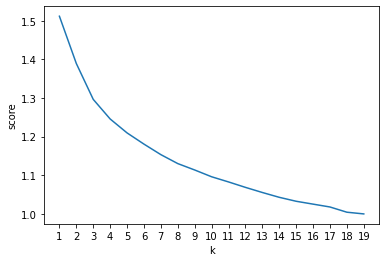

In [ ]:
k_values = range(1,20)
k_mean_models = [KMeans(n_clusters=k) for k in k_values]
scores = [kmean.fit(X).score(X) for kmean in k_mean_models]

norm_scores = [score/max(scores) for score in scores]

plt.plot(k_values,norm_scores)
plt.xlabel('k')
plt.xticks(range(1, 20))
plt.ylabel('score');

**K-means Clustering with k = 9**

In [ ]:
from sklearn.cluster import KMeans
# With k = 9
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

In [ ]:
y_kmeans[:20]

array([0, 5, 7, 6, 0, 7, 7, 7, 0, 4, 7, 7, 7, 0, 3, 7, 5, 6, 0, 6],
      dtype=int32)

[[ 4.38971452e-01 -2.56599058e-01]
 [ 3.54110126e-04  8.26696779e-01]
 [ 2.53735658e+00  1.01533431e-01]
 [-3.43531053e-01 -5.12890428e-01]
 [ 1.28644230e+00 -4.61982557e-01]
 [-4.92360104e-01  3.23835669e-01]
 [ 4.93534600e-02  1.99838728e-01]
 [-1.54597906e-01 -1.82725124e-01]
 [ 1.05177787e+00  5.75717871e-01]]


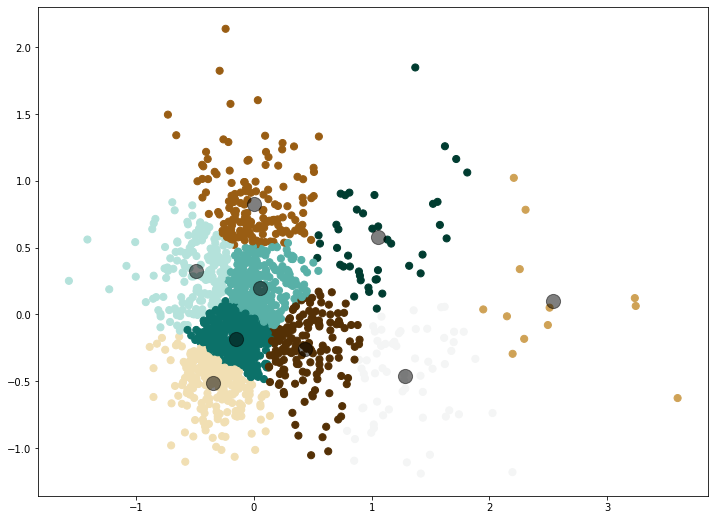

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='BrBG')

centers = kmeans.cluster_centers_
print(centers)
for i,j in centers:
  plt.scatter(i,j, c='black', s=200, alpha=0.5);

**K-means Clustering with k = 5**

In [ ]:
from sklearn.cluster import KMeans
# with k = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

[[-0.32957844  0.23896601]
 [ 1.35852389 -0.11394219]
 [ 0.21360911 -0.06895877]
 [-0.24820617 -0.38907613]
 [ 0.04295127  0.7725689 ]]


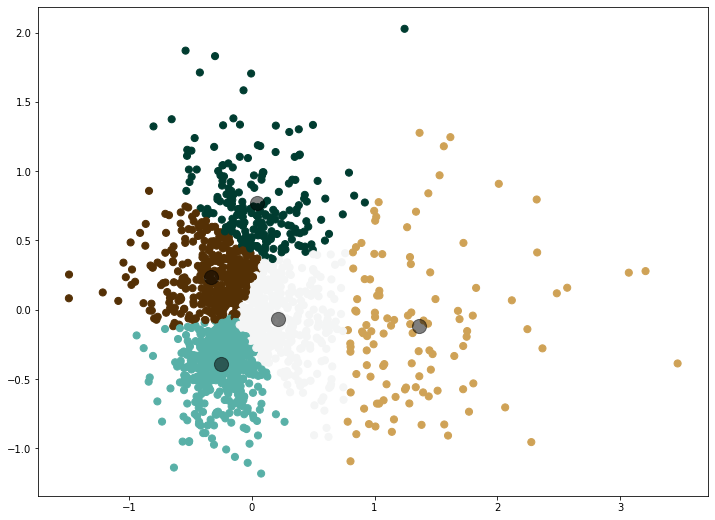

In [ ]:
# Visualize 
plt.figure(figsize=(12,9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='BrBG')

centers = kmeans.cluster_centers_
print(centers)
for i,j in centers:
  plt.scatter(i,j, c='black', s=200, alpha=0.5);

# 5. LDA: Evaluate Topic Model
(Latent Dirichlet Allocation)

## 5.1. Import libraries and Load data

In [ ]:
# Import libraries
import gensim
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess
import pickle
from pprint import pprint
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


In [ ]:
# Load data
path = r'/content/gdrive/MyDrive/Colab Notebooks/Final Project/Recipes/clean_recipe_training.csv'
frame = pd.read_csv(path, index_col=None, header=0, encoding='utf-8')

In [ ]:
# Copy data
df_clean = frame.copy()

## 5.2. Functions

In [ ]:
# Create stop_words:
stop_words = stopwords.words('english')
stop_words.extend(['tablespoons', 'tablespoon','cup', 'cups', 'ounce', 'ounces','teaspoon','teaspoons','coarse','grind',
                   'kosher','sea','zest', 'ground', 'extract', 'frozen', 'bottle', 'whole', 'taste','fresh', 'white',
                   'fluid','powder','sauce','syrup','large','small','chopped','granulated', 'cubes', 'concentrate', 
                   'wedge', 'flour', 'wedge', 'club', 'inch', 'dry', 'medium','red', 'whipped', 'yellow', 'milliliter', 
                   'triple', 'sec', 'optional', 'light', 'simple', 'slice', 'gram',  'instant',  'sliced',  'brown',
                   'dark', 'heavy',  'peeled', 'chilled', 'stick', 'cut', 'sticks', 'dried', 'half', 'black', 'twist', 'green'])


In [ ]:
# Lemmatization fuction:
lemmatizer = WordNetLemmatizer()
def lemma(row):
    return ' '.join([lemmatizer.lemmatize(word) for word in row.split()])

def lemma_stop(row):
    return ' '.join([lemmatizer.lemmatize(word) for word in row.split() if word not in stop_words])

In [ ]:
# Remove stop_words:
df_clean['no_stop'] = df_clean['recipe'].apply(lemma_stop)

In [ ]:
# Phrase modeling: Bi-grams and Tri-grams
def docs_with_grams(docs):
    """ Input a list of sentences.
        Output the list of sentences including bigram and trigram.
    """
    docs = np.array(list(map(lambda x: x.split(), docs)))
    bigram = Phrases(docs, min_count=10)
    trigram = Phrases(bigram[docs])

    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                docs[idx].append(token)
        for token in trigram[docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                docs[idx].append(token)
    return docs

In [ ]:
def get_dict_corpus(docs):
    # Create a dictionary representation of the documents.
    dictionary = Dictionary(docs)
    dictionary.filter_extremes(no_below=10, no_above=0.2)

    # Getting corpus 
    corpus = [dictionary.doc2bow(doc) for doc in docs]

    return dictionary, corpus

## 5.3. Data transformation: 

- Corpus and Dictionary

- Bi-grams and Tri-grams

In [ ]:
# # Phrase modeling: Bi-grams and Tri-grams
docs = docs_with_grams(df_clean['no_stop'].values)

In [ ]:
# Create corpus and dictionary
dictionary, corpus = get_dict_corpus(docs)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 366
Number of documents: 1539
[[(0, 1), (1, 1), (2, 1), (3, 2)]]


## 5.4. LDA base model

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=9, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
# Print the Keyword in the 9 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.160*"balsamic" + 0.112*"dash" + 0.083*"cake" + 0.077*"part" + '
  '0.054*"tomato" + 0.050*"leave" + 0.032*"piece" + 0.031*"kneading" + '
  '0.028*"confectioner" + 0.027*"pureed"'),
 (1,
  '0.071*"ribbon" + 0.057*"dash" + 0.054*"citric" + 0.053*"sprinkle" + '
  '0.052*"fry" + 0.044*"cucumber" + 0.041*"home" + 0.039*"fill" + '
  '0.034*"french" + 0.032*"aged"'),
 (2,
  '0.113*"cheese" + 0.103*"citron" + 0.058*"fruit" + 0.052*"cook" + '
  '0.047*"soften" + 0.040*"crush" + 0.040*"spice" + 0.035*"darjeele" + '
  '0.033*"direction" + 0.027*"chinese"'),
 (3,
  '0.094*"steam" + 0.081*"honey" + 0.074*"preserve" + 0.051*"splash" + '
  '0.050*"potato" + 0.050*"citric" + 0.038*"cinnamon" + 0.033*"sugar" + '
  '0.030*"dash" + 0.029*"irish"'),
 (4,
  '0.130*"extra" + 0.041*"cider" + 0.032*"fill" + 0.025*"greek" + 0.022*"cool" '
  '+ 0.021*"inch" + 0.021*"cacao" + 0.019*"fancy" + 0.018*"sage" + '
  '0.017*"sweetened_condense"'),
 (5,
  '0.074*"flavor" + 0.043*"season" + 0.042*"ring" + 0.039

## 5.5. Tuning model

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score: lda_model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43694930598167375


In [ ]:
# Supporting function to tune model
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
# Tuning model
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=270)
    
    # iterate through validation corpuses
    for i in range(1,len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 50%|█████     | 270/540 [24:58<24:58,  5.55s/it]


In [ ]:
# Save tuning results
path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/'
pd.DataFrame(model_results).to_csv(path + 'lda_tuning_results.csv', index=False)

In [ ]:
# Tuning results
results = pd.DataFrame(model_results)
results

,Validation_Set,Topics,Alpha,Beta,Coherence
0,100% Corpus,2,0.01,0.01,0.27
1,100% Corpus,2,0.01,0.31,0.33
2,100% Corpus,2,0.01,0.61,0.32
3,100% Corpus,2,0.01,0.91,0.32
4,100% Corpus,2,0.01,symmetric,0.32
...,...,...,...,...,...
265,100% Corpus,10,asymmetric,0.01,0.45
266,100% Corpus,10,asymmetric,0.31,0.45
267,100% Corpus,10,asymmetric,0.61,0.43
268,100% Corpus,10,asymmetric,0.91,0.37


In [ ]:
# Visualize tuning results
plot_data = results[(results['Alpha'] == 0.01 )&(results['Beta'] == 0.9099999999999999 )]
plot_data

,Validation_Set,Topics,Alpha,Beta,Coherence
3,100% Corpus,2,0.01,0.91,0.32
33,100% Corpus,3,0.01,0.91,0.40
63,100% Corpus,4,0.01,0.91,0.35
93,100% Corpus,5,0.01,0.91,0.43
123,100% Corpus,6,0.01,0.91,0.40
153,100% Corpus,7,0.01,0.91,0.42
183,100% Corpus,8,0.01,0.91,0.43
213,100% Corpus,9,0.01,0.91,0.45
243,100% Corpus,10,0.01,0.91,0.39


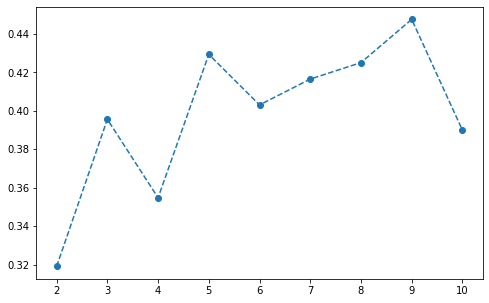

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(plot_data['Topics'],
         plot_data['Coherence'], marker='o', linestyle='dashed')
plt.show()

In [ ]:
# Final model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

## 5.6. Save final model

In [ ]:
# Save model
lda_model.save('/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/lda_5.model')

In [ ]:
# Save model
lda_model.save('/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/lda_final.model')

In [ ]:
# Save corpus and dictionary:
corpus_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/corpus.pkl'
dictionary_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/dict.pkl'
pickle.dump(corpus, open(corpus_path, 'wb'))  
pickle.dump(dictionary, open(dictionary_path, 'wb'))

## 5.7. Visualize the topics

In [ ]:
# Load model
lda_model = gensim.models.LdaModel.load('/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/lda_5.model')

In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import os

pyLDAvis.enable_notebook()
num_topics = 5
LDAvis_data_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/ldavis_prepared_'+str(num_topics)
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/ldavis_prepared_' + str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
1      0.01 -0.18       1        1 36.43
4     -0.20  0.02       2        1 30.66
0      0.03  0.09       3        1 17.05
3      0.11  0.00       4        1  8.21
2      0.05  0.06       5        1  7.64, topic_info=        Term   Freq  Total Category  logprob  loglift
49      milk 315.00 315.00  Default    30.00    30.00
13     cream 159.00 159.00  Default    29.00    29.00
17   vanilla 187.00 187.00  Default    28.00    28.00
18     vodka 117.00 117.00  Default    27.00    27.00
7      water 286.00 286.00  Default    26.00    26.00
..       ...    ...    ...      ...      ...      ...
64    ginger   7.35  39.13   Topic5    -4.55     0.90
711    break   3.22  10.88   Topic5    -5.38     1.35
175      mix   6.85  62.19   Topic5    -4.62     0.36
7      water   8.01 286.94   Topic5    -4.46    -1.01
20     slice   4.11  43.00   Topic5    -5.13     0.22

[245 rows x 6 columns], token_table=      Topic  Freq    Term
term                     
442       1  0.17  active
442       2  0.17  active
442       3  0.17  active
442       5  0.50  active
596       1  0.07     ale
...     ...   ...     ...
144       3  0.09  yogurt
111       1  0.90    yolk
111       2  0.05    yolk
111       3  0.05    yolk
111       5  0.05    yolk

[724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

# 6. LDA: NearestNeighbors

## 6.1. Import libraries - Data - LDA Model

In [ ]:
# Import libraries
import gensim
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess
import pickle
from pprint import pprint
from sklearn.neighbors import NearestNeighbors

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Paths
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/lda_new.model'
corpus_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/corpus.pkl'
dictionary_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/dict.pkl'
nbrs_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/nbrs.pkl'

# Load model, corpus, dictionary:
corpus = pickle.load(open(corpus_path, 'rb'))
dictionary = pickle.load(open(dictionary_path, 'rb'))
lda_model = gensim.models.ldamodel.LdaModel.load(model_path)
nbrs = pickle.load(open(nbrs_path, 'rb'))

## 6.2. Vector of document topics and test_doc

**Converting topics to feature vectors**

In [ ]:
# Document:
text_array = df_clean['no_stop']

# Topic vector in document:
recipe_vecs = []
for i in range(text_array.shape[0]):
    top_topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = list(map(lambda x:x[1], top_topics))
    recipe_vecs.append(topic_vec)

In [ ]:
recipe_vecs[1]

[0.746064, 0.000766325, 0.25163698, 0.000766325, 0.000766325]

In [ ]:
# Nearest Neighbors:
nbrs = NearestNeighbors(n_neighbors=5).fit(recipe_vecs)
nbrs_path = '/content/gdrive/MyDrive/Colab Notebooks/Final Project/Model/nbrs_5.pkl'
pickle.dump(nbrs, open(nbrs_path, 'wb'))

**Converting test doc to vectors**

In [ ]:
# Function to lemmatize for string input test doc
def lemma_stop_input(row):
    return ' '.join([lemmatizer.lemmatize(word) for word in row if word not in stop_words])

# Function to lemmatize & remove stop_words of test doc:
def preprocess_text(test_array):
    ''' Preprocess input text
        Output: list of vector of input text '''
    # Lemmatize and remove stop words    
    test_array = [lemma_stop(test_array)]
    # List of sentence include bigram and trigram
    docs = docs_with_grams(test_array)
    # Get corpus
    test_corpus = [dictionary.doc2bow(text) for text in docs] #id2word
    return test_corpus

# Function to find Vector of test doc
def doc_vecs(test_array):
    test_corpus = preprocess_text(test_array)
    result_vecs = []
    for i in range(len(test_corpus)):
        top_topics = lda_model.get_document_topics(test_corpus[i], minimum_probability=0.0)
        topic_vec = list(map(lambda x:x[1], top_topics))
        result_vecs.append(topic_vec)
    return result_vecs

In [ ]:
# Input and preprocess test doc
test_array = text_array[5]

# Vector of test doc
result_vecs = doc_vecs(test_array)
result_vecs

[[0.47674635, 0.5182949, 0.0016529313, 0.0016529313, 0.0016529313]]

## 6.3. Creat topics dictionary

In [ ]:
# Recipe vector & their topics:
topic_recipe = pd.DataFrame(recipe_vecs)
topics = np.argmax(recipe_vecs,axis=1)
topic_recipe['topics'] = topics
topic_recipe

,0,1,2,3,4,topics
0,0.51,0.00,0.00,0.48,0.00,0
1,0.75,0.00,0.25,0.00,0.00,0
2,0.00,0.00,1.00,0.00,0.00,2
3,0.00,0.98,0.00,0.00,0.00,1
4,0.00,0.00,0.56,0.00,0.44,2
...,...,...,...,...,...,...
1534,0.28,0.00,0.00,0.00,0.72,4
1535,0.70,0.30,0.00,0.00,0.00,0
1536,0.99,0.00,0.00,0.00,0.00,0
1537,0.63,0.00,0.37,0.00,0.00,0


In [ ]:
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"lime" + 0.048*"orange" + 0.044*"ginger_ale" + 0.034*"wine" + '
  '0.030*"liqueur" + 0.029*"3/4" + 0.029*"vodka" + 0.026*"soda" + '
  '0.020*"lemon-lime_soda" + 0.019*"peach"'),
 (1,
  '0.083*"½" + 0.039*"¼" + 0.036*"tea_bag" + 0.032*"ice" + '
  '0.031*"boiling_water" + 0.028*"15_jigger" + 0.022*"750_wine" + 0.020*"tea" '
  '+ 0.019*"vanilla" + 0.018*"109½"'),
 (2,
  '0.040*"liqueur" + 0.037*"irish_cream" + 0.035*"orange" + 0.035*"cinnamon" + '
  '0.029*"cream" + 0.027*"amaretto_liqueur" + 0.024*"apple_cider" + '
  '0.022*"apple" + 0.022*"maraschino_cherry" + 0.021*"pineapple"'),
 (3,
  '0.039*"vanilla" + 0.037*"cream" + 0.033*"pinch_salt" + 0.025*"egg" + '
  '0.025*"salt" + 0.025*"coffee" + 0.022*"egg_yolk" + 0.022*"chocolate" + '
  '0.020*"1/4" + 0.020*"pinch"'),
 (4,
  '0.050*"mint_leaf" + 0.043*"crème_de" + 0.037*"leaf" + 0.033*"mint" + '
  '0.028*"mint_sprig" + 0.027*"pepper" + 0.025*"1/4" + 0.025*"de" + '
  '0.024*"crème" + 0.022*"liqueur"')]


In [ ]:
# Print the Keyword in the 9 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.160*"balsamic" + 0.112*"dash" + 0.083*"cake" + 0.077*"part" + '
  '0.054*"tomato" + 0.050*"leave" + 0.032*"piece" + 0.031*"kneading" + '
  '0.028*"confectioner" + 0.027*"pureed"'),
 (1,
  '0.071*"ribbon" + 0.057*"dash" + 0.054*"citric" + 0.053*"sprinkle" + '
  '0.052*"fry" + 0.044*"cucumber" + 0.041*"home" + 0.039*"fill" + '
  '0.034*"french" + 0.032*"aged"'),
 (2,
  '0.113*"cheese" + 0.103*"citron" + 0.058*"fruit" + 0.052*"cook" + '
  '0.047*"soften" + 0.040*"crush" + 0.040*"spice" + 0.035*"darjeele" + '
  '0.033*"direction" + 0.027*"chinese"'),
 (3,
  '0.094*"steam" + 0.081*"honey" + 0.074*"preserve" + 0.051*"splash" + '
  '0.050*"potato" + 0.050*"citric" + 0.038*"cinnamon" + 0.033*"sugar" + '
  '0.030*"dash" + 0.029*"irish"'),
 (4,
  '0.130*"extra" + 0.041*"cider" + 0.032*"fill" + 0.025*"greek" + 0.022*"cool" '
  '+ 0.021*"inch" + 0.021*"cacao" + 0.019*"fancy" + 0.018*"sage" + '
  '0.017*"sweetened_condense"'),
 (5,
  '0.074*"flavor" + 0.043*"season" + 0.042*"ring" + 0.039

In [ ]:
# Creat topic dictionary base on model
topic_dict = {0: 'fruit_juice',
              1: 'cocktail',
              2: 'liqueur',
              3: 'cream_milk_coffee',
              4: 'spice'}

## 6.4. Recommended nearest topics

In [ ]:
# Find the nearest vector 
distances, indices = nbrs.kneighbors(result_vecs)
print(distances)
print(indices)

[[0.00319164 0.00621646 0.01717708 0.02957187 0.03294551]]
[[1240 1301 1272  991 1445]]


In [ ]:
# Recipe of test doc
recipe_test = df_clean.loc[5]
recipe_test

drink_name                                        spiked lemonade
recipe          5 1/2 to 6 cups water 1 1/2 cups sugar 1 table...
recipe_url      https://www.thespruceeats.com/spiked-lemonade-...
url_of_image    https://www.thespruceeats.com/thmb/oxlHoBxYAYz...
no_stop         5 1/2 6 water 1 1/2 sugar 1 lemon 6 8 lemon 1/...
Name: 5, dtype: object

In [ ]:
# Top 5 nearest recipes for the test doc
top_vecs = df_clean.iloc[indices[0]]

,drink_name,recipe,recipe_url,url_of_image,no_stop
1240,easy punch,4 013 ounce packages unsweetened strawberry-fl...,https://www.allrecipes.com/recipe/18935/easy-p...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,4 013 package unsweetened strawberry-flavored ...
1301,georgia sunset,1 15 fluid ounce jigger brandy 1 15 fluid oun...,https://www.allrecipes.com/recipe/105670/georg...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 15 jigger brandy 1 15 jigger peach schnapps ...
1272,white sangria with frozen fruit,1 750 milliliter bottle white wine ½ cup peac...,https://www.allrecipes.com/recipe/280702/white...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 750 wine ½ peach schnapps ¼ sugar ¼ peach ¼ ...
991,mimosa,¾ cup champagne chilled ¼ cup orange juice,https://www.allrecipes.com/recipe/23758/mimosa/,https://imagesvc.meredithcorp.io/v3/mm/image?u...,¾ champagne ¼ orange juice
1445,lavender simple syrup recipe,1 cup water 3 tablespoons lavender flowers 2 c...,https://www.thespruceeats.com/diy-lavender-sim...,https://www.thespruceeats.com/thmb/traBxjTpHBb...,1 water 3 lavender flower 2 sugar


In [ ]:
# Recommend topics for the test doc
topic_recipe.iloc[indices[0]]

,0,1,2,3,4,topics
1240,0.48,0.52,0.00,0.00,0.00,1
1301,0.48,0.52,0.00,0.00,0.00,1
1272,0.47,0.53,0.00,0.00,0.00,1
991,0.45,0.54,0.00,0.00,0.00,1
1445,0.49,0.49,0.00,0.00,0.00,0


In [ ]:
# Check top 5 recommended topics and recipes informations:
for i in indices[0]:
    print('Topic:' + topic_dict[topic_recipe['topics'][i]])
    print(df_clean.iloc[i]['drink_name'] + ': ' + df_clean.iloc[i]['recipe'])

Topic:cocktail
easy punch: 4 013 ounce packages unsweetened strawberry-flavored drink mix powder  2 46 fluid ounce cans pineapple juice  3 cups white sugar  4 quarts water  2 liters ginger ale 
Topic:cocktail
georgia sunset: 1 15 fluid ounce jigger brandy  1 15 fluid ounce jigger peach schnapps  1 fluid ounce grenadine syrup  ¼ cup chilled lemon-lime soda 
Topic:cocktail
white sangria with frozen fruit: 1 750 milliliter bottle white wine  ½ cup peach schnapps  ¼ cup white sugar  ¼ cup frozen sliced peaches or to taste  ¼ cup frozen sliced mango or to taste  ¼ cup frozen raspberries or to taste 
Topic:cocktail
mimosa: ¾ cup champagne chilled  ¼ cup orange juice 
Topic:fruit_juice
lavender simple syrup recipe: 1 cup water 3 tablespoons lavender flowers 2 cups sugar
